In [44]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [45]:
df_credits = pd.read_csv("../data/credits.csv")

In [46]:
from ast import literal_eval

df_credits['cast'] = df_credits['cast'].apply(literal_eval)

In [47]:
def get_name(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return [names]
    return []

In [48]:
cast = df_credits['cast']
cast = cast.apply(get_name)
ids = list(df_credits['id'])
for i in range(len(cast)):
    cast[i].append(ids[i])
cast[0]

[['Tom Hanks',
  'Tim Allen',
  'Don Rickles',
  'Jim Varney',
  'Wallace Shawn',
  'John Ratzenberger',
  'Annie Potts',
  'John Morris',
  'Erik von Detten',
  'Laurie Metcalf',
  'R. Lee Ermey',
  'Sarah Freeman',
  'Penn Jillette'],
 862]

In [49]:
df = pd.DataFrame()
for x in cast:
    diction = {'cast_name': x[0], 'movie_id': x[1]}
    df = df.append(diction, ignore_index=True)
df.head()

,cast_name,movie_id
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",862
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",8844
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",15602
3,"[Whitney Houston, Angela Bassett, Loretta Devi...",31357
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...",11862


In [50]:
df_movie = pd.read_csv("../data/movies_metadata.csv")

In [51]:
df_movie = df_movie[["budget","genres","title","revenue","id"]]
df_movie.head()

,budget,genres,title,revenue,id
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,373554033.0,862
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,262797249.0,8844
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,0.0,15602
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,81452156.0,31357
4,0,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,76578911.0,11862


In [52]:
literal_eval(df_movie.genres.values[0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [53]:
uniqueGenres = set([])
for i in df_movie.genres.values: # I am looping through all the rows
    genList = literal_eval(i) # convert from string to list of dict
    for j in genList: # loop through the list of dict
        uniqueGenres.add(j["name"]) # add the name of the genre to my uniqueGenres variabe
uniqueGenres

{'Action',
 'Adventure',
 'Animation',
 'Aniplex',
 'BROSTA TV',
 'Carousel Productions',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'GoHands',
 'History',
 'Horror',
 'Mardock Scramble Production Committee',
 'Music',
 'Mystery',
 'Odyssey Media',
 'Pulser Productions',
 'Rogue State',
 'Romance',
 'Science Fiction',
 'Sentai Filmworks',
 'TV Movie',
 'Telescene Film Group Productions',
 'The Cartel',
 'Thriller',
 'Vision View Entertainment',
 'War',
 'Western'}

In [54]:
rows = [] # for all the movies
genres = list(uniqueGenres) # all unique Genres

for i in df_movie.genres: #looping through all the rows/movies
  genList = literal_eval(i) #converting from string to list of dict for a particular movie
  movieGenres = [x['name'] for x in genList] # list of all the genres of the movie
  row = [] # store a list of 1s and 0s for one movie
  for j in genres: #loop through all unique genres
    row.append(int(j in movieGenres)) #checking if the genre is present in that movie - if the genre is present 1 else 0
  rows.append(row)

In [55]:
genre = pd.DataFrame(rows,columns = genres)
genre

,Carousel Productions,BROSTA TV,Mystery,Science Fiction,GoHands,Odyssey Media,History,The Cartel,Western,Fantasy,...,Sentai Filmworks,TV Movie,Animation,Drama,Telescene Film Group Productions,Documentary,Crime,Music,Aniplex,Pulser Productions
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
45462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
45463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
45464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_movie = pd.concat([df_movie,genre], axis = 1) # joing the two dataframes
df_movie.shape, genre.shape

((45466, 37), (45466, 32))

In [57]:
df_movie = df_movie.drop(columns = ['genres'])

In [58]:
df_movie.head()

,budget,title,revenue,id,Carousel Productions,BROSTA TV,Mystery,Science Fiction,GoHands,Odyssey Media,...,Sentai Filmworks,TV Movie,Animation,Drama,Telescene Film Group Productions,Documentary,Crime,Music,Aniplex,Pulser Productions
0,30000000,Toy Story,373554033.0,862,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,65000000,Jumanji,262797249.0,8844,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Grumpier Old Men,0.0,15602,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,Waiting to Exhale,81452156.0,31357,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,Father of the Bride Part II,76578911.0,11862,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df_movie["revenue"].isnull().sum()

6

In [60]:
df_movie = df_movie[df_movie['revenue'].notna()]

In [61]:
df_movie["revenue"].isnull().sum()

0

In [62]:
df_movie["revenue"][0]

373554033.0

In [63]:
sum(df_movie["revenue"] == 0)

38052

In [64]:
(sum(df_movie["revenue"] == 0)/df_movie.shape[0])*100

83.70435547734272

In [65]:
df_movie_revenue = df_movie
df_movie_revenue["revenue"] = df_movie_revenue["revenue"].replace(0, pd.np.nan)

In [66]:
df_movie_revenue["revenue"].isnull().sum()

38052

In [67]:
df_movie_revenue = df_movie_revenue[df_movie_revenue['revenue'].notna()]
df_movie_revenue["revenue"].isnull().sum()
df_movie_revenue["revenue"].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [68]:
df_movie_revenue["budget"] = df_movie_revenue["budget"].astype(int)
df_movie_revenue["budget"][0]

30000000

In [69]:
sum(df_movie_revenue["budget"] == 0)

2027

In [70]:
(sum(df_movie_revenue["budget"] == 0)/df_movie_revenue.shape[0])*100

27.36231101511879

In [71]:
df_movie_revenue_budget = df_movie_revenue
df_movie_revenue_budget["budget"] = df_movie_revenue_budget["budget"].replace(0, pd.np.nan)
df_movie_revenue_budget = df_movie_revenue_budget[df_movie_revenue_budget['budget'].notna()]
df_movie_revenue_budget["budget"].isnull().sum()
df_movie_revenue_budget["budget"].describe()

count    5.381000e+03
mean     3.109480e+07
std      4.016263e+07
min      1.000000e+00
25%      5.037000e+06
50%      1.700000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [72]:
df_movie_revenue_budget.head()

,budget,title,revenue,id,Carousel Productions,BROSTA TV,Mystery,Science Fiction,GoHands,Odyssey Media,...,Sentai Filmworks,TV Movie,Animation,Drama,Telescene Film Group Productions,Documentary,Crime,Music,Aniplex,Pulser Productions
0,30000000.0,Toy Story,373554033.0,862,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,65000000.0,Jumanji,262797249.0,8844,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16000000.0,Waiting to Exhale,81452156.0,31357,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,60000000.0,Heat,187436818.0,949,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8,35000000.0,Sudden Death,64350171.0,9091,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df_movie_revenue_budget.shape

(5381, 36)

In [74]:
df_movie_revenue_budget.rename(columns = {'id':'movie_id'}, inplace = True)
df_movie_revenue_budget["movie_id"].astype(str).astype(int).dtypes

dtype('int64')

In [75]:
df_movie_revenue_budget["movie_id"] = df_movie_revenue_budget["movie_id"].astype(str).astype(int)
df_movie_revenue_budget.dtypes

budget                                   float64
title                                     object
revenue                                  float64
movie_id                                   int64
Carousel Productions                       int64
BROSTA TV                                  int64
Mystery                                    int64
Science Fiction                            int64
GoHands                                    int64
Odyssey Media                              int64
History                                    int64
The Cartel                                 int64
Western                                    int64
Fantasy                                    int64
Comedy                                     int64
Action                                     int64
Thriller                                   int64
Family                                     int64
Horror                                     int64
Mardock Scramble Production Committee      int64
Romance             

In [76]:
df_movie_revenue_budget_cast = df_movie_revenue_budget.merge(df, on = "movie_id", how = 'left')

In [77]:
df_movie_revenue_budget_cast.shape

(5393, 37)

In [78]:
df_movie_revenue_budget_cast.head(10)

,budget,title,revenue,movie_id,Carousel Productions,BROSTA TV,Mystery,Science Fiction,GoHands,Odyssey Media,...,TV Movie,Animation,Drama,Telescene Film Group Productions,Documentary,Crime,Music,Aniplex,Pulser Productions,cast_name
0,30000000.0,Toy Story,373554033.0,862,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,65000000.0,Jumanji,262797249.0,8844,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,16000000.0,Waiting to Exhale,81452156.0,31357,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[Whitney Houston, Angela Bassett, Loretta Devi..."
3,60000000.0,Heat,187436818.0,949,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo..."
4,35000000.0,Sudden Death,64350171.0,9091,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ..."
5,58000000.0,GoldenEye,352194034.0,710,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,..."
6,62000000.0,The American President,107879496.0,9087,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[Michael Douglas, Annette Bening, Michael J. F..."
7,44000000.0,Nixon,13681765.0,10858,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[Anthony Hopkins, Joan Allen, Powers Boothe, E..."
8,98000000.0,Cutthroat Island,10017322.0,1408,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Geena Davis, Matthew Modine, Frank Langella, ..."
9,52000000.0,Casino,116112375.0,524,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,"[Robert De Niro, Sharon Stone, Joe Pesci, Jame..."


In [85]:
all_actors = []
for name in df_movie_revenue_budget_cast.cast_name:
    all_actors.extend(name)

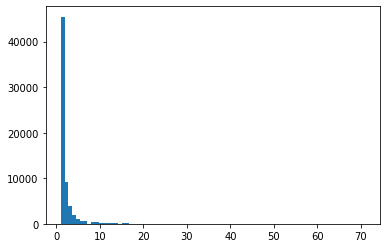

In [140]:
from collections import Counter
import matplotlib.pyplot as plt
actors_fre = Counter(all_actors)
all_fre = list(actors_fre.values())
plt.hist(all_fre, bins = 80)
plt.show()

In [148]:
all_fre.sort()
greater5 = 0
for i in range(len(all_fre)):
    if all_fre[i] > 20:
        greater5 = i
        break
all_fre = all_fre[greater5:]
len(all_fre)

333

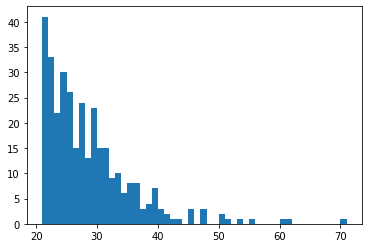

In [150]:
plt.hist(all_fre, bins = 50)
plt.show()

In [154]:
print('From this, we can assume that the top five percent of actors in the number of movies are famous actors')
all_fre = list(actors_fre.values())
all_fre.sort()
all_fre = all_fre[int(len(all_fre)*0.95):]
print('The number of top five percent actors is', len(all_fre))
print('The top ten percent of actors have acted in at least {} films'.format(all_fre[0]))

From this, we can assume that the top five percent of actors in the number of movies are famous actors
The number of top five percent actors is 3251
The top ten percent of actors have acted in at least 6 films


In [157]:
famous_actors = set()
for actor in actors_fre:
    if actors_fre[actor] >= 6:
        famous_actors.add(actor)

In [173]:
famous_actors_df = []
famous_actors_num_df = []
for names in df_movie_revenue_budget_cast.cast_name:
    temp = []
    n = 0
    for name in names:
        if name in famous_actors:
            temp.append(name)
            n += 1
    famous_actors_df.append(temp)
    famous_actors_num_df.append(n)


In [174]:
df_movie_revenue_budget_cast['famous_actors']= famous_actors_df
df_movie_revenue_budget_cast['num_famous_actors']= famous_actors_num_df

In [175]:
df_movie_revenue_budget_cast.head(5)

,budget,title,revenue,movie_id,Carousel Productions,BROSTA TV,Mystery,Science Fiction,GoHands,Odyssey Media,...,Telescene Film Group Productions,Documentary,Crime,Music,Aniplex,Pulser Productions,cast_name,famous actors,famous_actors,num_famous_actors
0,30000000.0,Toy Story,373554033.0,862,0,0,0,0,0,0,...,0,0,0,0,0,0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...","[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",8
1,65000000.0,Jumanji,262797249.0,8844,0,0,0,0,0,0,...,0,0,0,0,0,0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",9
2,16000000.0,Waiting to Exhale,81452156.0,31357,0,0,0,0,0,0,...,0,0,0,0,0,0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Angela Bassett, Loretta Devine, Gregory Hines...","[Angela Bassett, Loretta Devine, Gregory Hines...",7
3,60000000.0,Heat,187436818.0,949,0,0,0,0,0,0,...,0,0,1,0,0,0,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",30
4,35000000.0,Sudden Death,64350171.0,9091,0,0,0,0,0,0,...,0,0,0,0,0,0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...","[Jean-Claude Van Damme, Powers Boothe, Raymond...","[Jean-Claude Van Damme, Powers Boothe, Raymond...",3


In [176]:
df_movie_revenue_budget_cast.describe

<bound method NDFrame.describe of           budget              title      revenue  movie_id  \
0     30000000.0          Toy Story  373554033.0       862   
1     65000000.0            Jumanji  262797249.0      8844   
2     16000000.0  Waiting to Exhale   81452156.0     31357   
3     60000000.0               Heat  187436818.0       949   
4     35000000.0       Sudden Death   64350171.0      9091   
...          ...                ...          ...       ...   
5388  12000000.0   Sivaji: The Boss   19000000.0     24049   
5389    750000.0        All at Once          3.0    280422   
5390    800000.0            Savages    1328612.0     62757   
5391   2000000.0        Pro Lyuboff    1268793.0     63281   
5392   5000000.0            Antidur    1413000.0     63898   

      Carousel Productions  BROSTA TV  Mystery  Science Fiction  GoHands  \
0                        0          0        0                0        0   
1                        0          0        0                0      

In [177]:
cond = df_movie_revenue_budget_cast.num_famous_actors > 0
df_movie_revenue_budget_cast = df_movie_revenue_budget_cast[cond]

In [178]:
df_movie_revenue_budget_cast.shape

(4945, 40)

In [179]:
df_movie_revenue_budget_cast['profit'] = df_movie_revenue_budget_cast.revenue - df_movie_revenue_budget_cast.budget

In [181]:
df_movie_revenue_budget_cast.head(5)

,budget,title,revenue,movie_id,Carousel Productions,BROSTA TV,Mystery,Science Fiction,GoHands,Odyssey Media,...,Documentary,Crime,Music,Aniplex,Pulser Productions,cast_name,famous actors,famous_actors,num_famous_actors,profit
0,30000000.0,Toy Story,373554033.0,862,0,0,0,0,0,0,...,0,0,0,0,0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...","[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",8,343554033.0
1,65000000.0,Jumanji,262797249.0,8844,0,0,0,0,0,0,...,0,0,0,0,0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",9,197797249.0
2,16000000.0,Waiting to Exhale,81452156.0,31357,0,0,0,0,0,0,...,0,0,0,0,0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Angela Bassett, Loretta Devine, Gregory Hines...","[Angela Bassett, Loretta Devine, Gregory Hines...",7,65452156.0
3,60000000.0,Heat,187436818.0,949,0,0,0,0,0,0,...,0,1,0,0,0,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",30,127436818.0
4,35000000.0,Sudden Death,64350171.0,9091,0,0,0,0,0,0,...,0,0,0,0,0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...","[Jean-Claude Van Damme, Powers Boothe, Raymond...","[Jean-Claude Van Damme, Powers Boothe, Raymond...",3,29350171.0
